In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from variational_method.method import method
import variational_method.metrics as metrics
import findiff

In [3]:
def super_gauss(x, y, a, N):
    """
    Супергаусс на сетке x,y с параметрами a, N
    :param x: сетка по x
    :param y: сетка по y
    :param a: параметр, отвечает за размер области, которую срезает супергаусс
    :param N: отвечает за "крутизну" супергаусс, чем больше, тем быстрее функция стремится к 0
    :return: 2d array
    """
    return np.exp(-((x**2 + y**2) / a**2) ** N)


def normalize(front):
    """
    Нормирует исходный волновой фронт на квадрат [-1, 1] x [-1, 1]
    :param front: волновой фронт
    :return: отнормированный волновой фронт
    """
    tmp = front
    tmp -= tmp.min()
    tmp /= tmp.max()
    return tmp


def mse(orig, restored):
    return np.linalg.norm(orig - restored) / np.sqrt(np.prod(restored.shape))


def get_mask(x, y, r):
    return 1 *(x**2 + y**2 < r**2)


def cernike(x, y, func):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(x, y)
    return func(rho, phi)

In [16]:
x, y = np.mgrid[-1:1:1j*512, -1:1:1j*512]
h = x[1, 0] - x[0, 0]
a = 0.75
N = 5
s_gauss = super_gauss(x, y, a, N)
front = cernike(x, y, lambda rho, phi : rho**2 * np.cos(2 * phi))
#front *= s_gauss
d_dx = findiff.FinDiff(0, h)
d_dy = findiff.FinDiff(1, h)
g1, g2 = d_dx(front), d_dy(front)#np.gradient(front)


C:\ProgramData\Anaconda3\lib\site-packages\findiff\findiff.py:242: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yd[ref_multi_slice] += w * y[off_multi_slice]


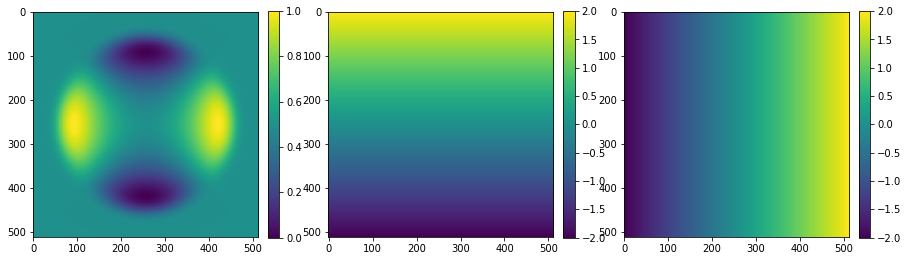

In [17]:
mask = get_mask(x, y, a * 0.5)
fig, ax = plt.subplots(1, 3,  figsize = (15, 10))
im1 = ax[0].imshow(normalize(front * s_gauss))
im2 = ax[1].imshow(g1)
im3 = ax[2].imshow(g2)
fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
fig.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04)

In [18]:
restored_front = method(g1, g2, h, h, alpha=1e-3, gamma=0.0028, s=0.842)

MSE =  4.9530393470429383e-05


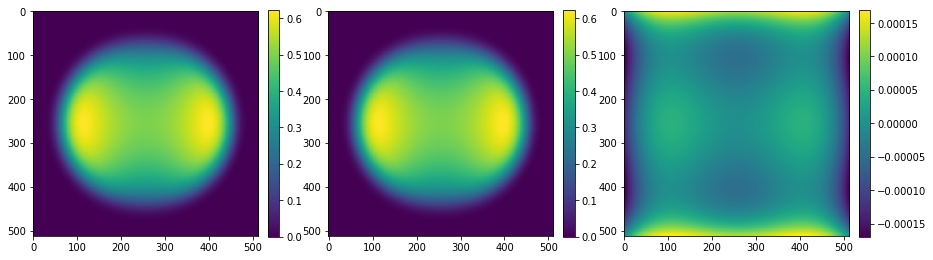

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (15, 10))
orig = normalize(normalize(front) * 1)
restored = normalize(normalize(restored_front) * 1)
im1 = ax[0].imshow(orig * s_gauss)
im2 = ax[1].imshow(restored *  s_gauss)
im3 = ax[2].imshow(orig - restored)
fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
fig.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04)
print("MSE = ", metrics.L2(orig * s_gauss, restored * s_gauss))